Alex Gagliano, 05/10/2020

Let's start by importing our required packages.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
from astropy.time import Time
from collections import Counter

sns.set_context("talk")
sns.set_style("white")
sns.set_palette("colorblind")


plt.rcParams['xtick.major.size'] = 16
plt.rcParams['ytick.major.size'] = 16

plt.rcParams['xtick.minor.size'] = 8
plt.rcParams['ytick.minor.size'] = 8
plt.rcParams['xtick.minor.width'] = 2
plt.rcParams['ytick.minor.width'] = 2

plt.rcParams['xtick.major.width'] = 2
plt.rcParams['ytick.major.width'] = 2
plt.rcParams['xtick.bottom'] = True
plt.rcParams['xtick.top'] = True
plt.rcParams['ytick.left'] = True
plt.rcParams['ytick.right'] = True

plt.rcParams['xtick.minor.visible'] = True
plt.rcParams['ytick.minor.visible'] = True
plt.rcParams['xtick.direction'] = 'in'
plt.rcParams['ytick.direction'] = 'in'

In [2]:
#fullDF = pd.read_csv("/Users/alexgagliano/Documents/Research/2020oi/data/photometry/2020oiphotometry_wSynthetic_rBand.csv")
fullDF = pd.read_csv("/Users/alexgagliano/Documents/Research/2020oi/data/photometry/2020oi_finalPhotometry_0133ExtCorr.csv")
reducedDF = fullDF[['MJD', 'MAG', "MAGERR", 'FLT', 'ULIM', 'TELESCOPE']]

In [3]:
#4kx4k is swope
#2kx2k is Nickel
#GPC1 is 'Pan-STARRS1'

reducedDF.loc[reducedDF['TELESCOPE'] == 'Direct/2Kx2K', 'TELESCOPE'] = 'Nickel'
reducedDF.loc[reducedDF['TELESCOPE'] == 'Direct/4Kx4K', 'TELESCOPE'] = 'Swope'
reducedDF.loc[reducedDF['TELESCOPE'] == 'GPC1', 'TELESCOPE'] = 'Pan-STARRS1'

#reducedDF.loc[reducedDF['TELESCOPE'] == 'Pan-STARRS1', 'TELESCOPE'] = 'Pan-STARRS1 GPC1'


reducedDF.loc[reducedDF['TELESCOPE'] == 'ZTF-Cam', 'TELESCOPE'] = 'ZTF'
reducedDF.loc[reducedDF['TELESCOPE'] == 'P48', 'TELESCOPE'] = 'ZTF'
reducedDF.loc[reducedDF['TELESCOPE'] == 'Siding Spring 1m', 'TELESCOPE'] = 'LCO'
reducedDF.loc[reducedDF['TELESCOPE'] == 'Sinistro', 'TELESCOPE'] = 'LCO'
reducedDF.loc[reducedDF['TELESCOPE'] == 'Pan-STARRS1', 'TELESCOPE'] = 'PS1'
reducedDF.loc[reducedDF['TELESCOPE'] == 'Swift', 'TELESCOPE'] = '$Swift$'

np.unique(reducedDF['TELESCOPE'])

/Users/alexgagliano/miniconda3/lib/python3.7/site-packages/pandas/core/indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


array(['$Swift$', 'Gaia', 'LCO', 'Nickel', 'PS1', 'Swope', 'Synthetic',
       'Thacher', 'ZTF'], dtype=object)

In [4]:
t0 = 58854.2

reducedDF['PHASE'] = reducedDF['MJD'].values - t0

In [5]:
reducedDF['MJD'] = np.round(reducedDF['MJD'], 2)
reducedDF['PHASE'] = np.round(reducedDF['PHASE'], 2)
reducedDF['MAG'] = np.round(reducedDF['MAG'], 2)
reducedDF['MAGERR'] = np.round(reducedDF['MAGERR'], 2)

In [6]:
reducedDF['PHASE'] = "+" + reducedDF['PHASE'].astype(str) 

In [7]:
reducedDF.sort_values(by=['MJD', ], inplace=True)

reducedDF.loc[reducedDF['MAGERR']>1.086, 'ULIM'] = 1
reducedDF.loc[reducedDF['ULIM']!= reducedDF['ULIM'], 'ULIM'] = 0.
reducedDF['ULIM'] = reducedDF['ULIM'].astype(np.integer)

In [8]:
reducedDF.loc[reducedDF['FLT']=='r-ZTF', 'FLT'] = 'r'
reducedDF.loc[reducedDF['FLT']=='g-ZTF', 'FLT'] = 'g'
reducedDF.loc[reducedDF['FLT']=='up', 'FLT'] = 'u'
reducedDF.loc[reducedDF['FLT']=='rp', 'FLT'] = 'r'
reducedDF.loc[reducedDF['FLT']=='gp', 'FLT'] = 'g'
reducedDF.loc[reducedDF['FLT']=='ip', 'FLT'] = 'i'

reducedDF.loc[reducedDF['FLT']=='u', 'FLT'] = '$u$'
reducedDF.loc[reducedDF['FLT']=='r', 'FLT'] = '$r$'
reducedDF.loc[reducedDF['FLT']=='g', 'FLT'] = '$g$'
reducedDF.loc[reducedDF['FLT']=='i', 'FLT'] = '$i$'
reducedDF.loc[reducedDF['FLT']=='z', 'FLT'] = '$z$'

reducedDF.loc[reducedDF['FLT']=='U', 'FLT'] = '$U$'
reducedDF.loc[reducedDF['FLT']=='B', 'FLT'] = '$B$'
reducedDF.loc[reducedDF['FLT']=='V', 'FLT'] = '$V$'
reducedDF.loc[reducedDF['FLT']=='UVM2', 'FLT'] = '$UVM2$'
reducedDF.loc[reducedDF['FLT']=='UVW2', 'FLT'] = '$UVW2$'
reducedDF.loc[reducedDF['FLT']=='UVW1', 'FLT'] = '$UVW1$'
reducedDF.loc[reducedDF['FLT']=='G', 'FLT'] = '$G$'

reducedDF = reducedDF[reducedDF['FLT']!= 'orange']

reducedDF['MAG'] = reducedDF['MAG'].astype(str) 

In [9]:
np.unique(reducedDF['FLT'].values)

array(['$B$', '$G$', '$U$', '$UVM2$', '$UVW1$', '$UVW2$', '$V$', '$g$',
       '$i$', '$r$', '$u$', '$z$'], dtype=object)

In [10]:
mags = []
mags_err = []

for idx, row in reducedDF.iterrows():
    if row['ULIM']:
        mags.append(">" + row['MAG'])
        mags_err.append("--")
    else:
        mags.append(str(row['MAG']))
        mags_err.append(row['MAGERR'])

reducedDF['MAG'] = mags
reducedDF['MAGERR'] = mags_err
del reducedDF['ULIM']

In [11]:
wle = {'UVW2': 2030, 'UVM2': 2231, 'UVW1': 2634, 'u': 3560,   'U': 3600, \
       'B': 4380, 'g': 4830, 'V': 5450, 'r': 6260, 'G': 6730, 'i': 7670, 'z': 8890}

bands = np.array(['$UVW2$', '$UVM2$', '$UVW1$', '$u$','$U$', '$B$', '$g$', '$V$','$r$', '$G$', '$i$','$z$'])

In [12]:
newDF_list = []
#re-arrange by band
for band in bands:
    tempDF = reducedDF[reducedDF['FLT']==band]
    #make sure we're still sorted by MJD
    tempDF.sort_values(by=['MJD'], inplace=True)
    newDF_list.append(tempDF)
newDF = pd.concat(newDF_list, ignore_index=True)

/Users/alexgagliano/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [13]:
newDF_cols = newDF[['MJD', 'PHASE', 'FLT', 'MAG', 'MAGERR','TELESCOPE']]

In [14]:
newDF_cols.to_csv("/Users/alexgagliano/Documents/Research/2020oi/data/photometry/photometryForPaper.csv",index=False)

In [15]:
#data = pd.read_csv("/Users/alexgagliano/Documents/Research/2020oi/data/photometry/2020oiphotometry_clean_wUVOT.csv")
data = pd.read_csv("/Users/alexgagliano/Documents/Research/2020oi/data/photometry/2020oiphotometry_TotalExtCorr_AllData.csv")

/Users/alexgagliano/miniconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


(0.0, 3.0)

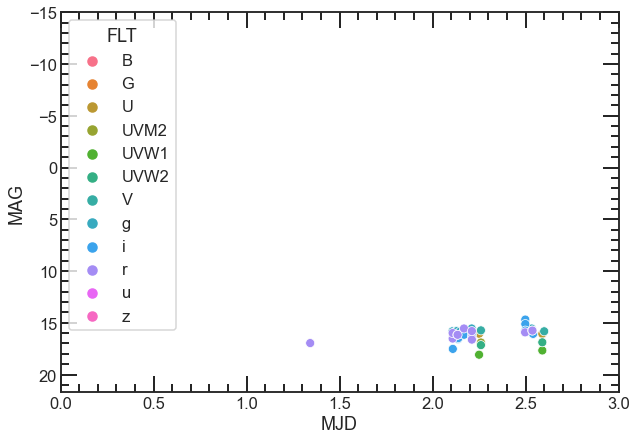

In [16]:
plt.figure(figsize=(10,7))
sns.scatterplot(data['MJD']-t0, data['MAG'],hue=data['FLT'])
plt.gca().invert_yaxis()
plt.xlim((0, 3))

#Looks a lot cleaner! How many bands do we have from the public data? 

In [17]:
#data_swift = data[data['TELESCOPE']=='Swift']
#fullDF = fullDF[fullDF['TELESCOPE']!='Swift']
#fullDF = pd.concat([fullDF, data_swift],ignore_index=True)
#fullDF.to_csv("/Users/alexgagliano/Documents/Research/2020oi/data/photometry/2020oiphotometry.csv",index=False)

Text(0, 0.5, 'Magnitude')

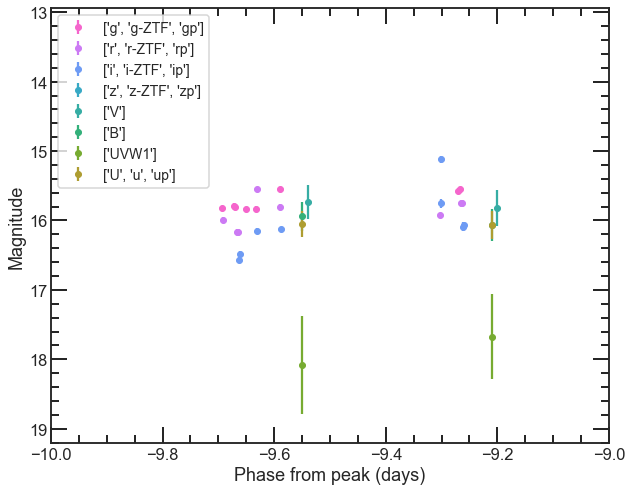

In [18]:
data_plt = data
#data_plt.loc[data_plt['FLT'] == 'g-ZTF', 'FLT'] = 'g'
#data_plt.loc[data_plt['FLT'] == 'gp', 'FLT'] = 'g'
#data_plt.loc[data_plt['FLT'] == 'up', 'FLT'] = 'u'
#data_plt.loc[data_plt['FLT'] == 'ip', 'FLT'] = 'i'
#data_plt.loc[data_plt['FLT'] == 'rp', 'FLT'] = 'r'
#data_plt.loc[data_plt['FLT'] == 'r-ZTF', 'FLT'] = 'r'

colors = sns.husl_palette(10)
#sns.hls_palette(8, l=.3, s=.8)
colors.reverse()
plt.figure(figsize=(10,8))
#bands = [['g', 'g-ZTF', 'gp'],['r', 'r-ZTF', 'rp'],['i', 'i-ZTF', 'ip'],['z', 'z-ZTF', 'zp']]
#bands = [['g', 'g-ZTF', 'gp'],['r', 'r-ZTF', 'rp'],['i', 'i-ZTF', 'ip'],['z', 'z-ZTF', 'zp'], ['V'], ['B'], ['UVW1'], ['U', 'u', 'up']]
bands = [['g', 'g-ZTF', 'gp'],['r', 'r-ZTF', 'rp'],['i', 'i-ZTF', 'ip'],['z', 'z-ZTF', 'zp'], ['V'], ['B'], ['UVW1'], ['U','u', 'up']]
#bands = [['g', 'g-ZTF', 'gp'],['r', 'r-ZTF', 'rp'],['i', 'i-ZTF', 'ip'], ['B']]
#bands = [['g', 'g-ZTF', 'gp'],['r', 'r-ZTF', 'rp'],['i', 'i-ZTF', 'ip'],]
#bands = [['g', 'g-ZTF', 'gp']]

j = 0
clean_data = []
for i in np.arange(len(bands)):
    band = bands[i]
    tmp = data_plt[data_plt['FLT'].isin(band)]
    if band == ['U','u', 'up']:
        tmp = tmp[tmp['TELESCOPE'].isin(['Swope', 'Swift'])]
        tmp_early = tmp[(tmp['MJD']-58866) < 0]
        tmp_late = tmp[(tmp['MJD']-58866) > 0]
        tmp_late = tmp_late[tmp_late['MAGERR'] < 0.5]
        tmp = pd.concat([tmp_early, tmp_late],ignore_index=True)
    elif band == ['UVW1']:
        tmp = tmp[tmp['MAGERR'] < 1.]
        tmp = tmp[(tmp['MJD']-t0) < 20.]
    else:
        if (band == ['z', 'z-ZTF', 'zp']):
            tmp = tmp[tmp['MAGERR'] < 0.5]
        elif (band == ['B']) | (band ==['V']):
            tmp_early = tmp[(tmp['MJD']-58866) < 0]
            tmp_late = tmp[(tmp['MJD']-58866) > 0]
            tmp_late = tmp_late[tmp_late['MAGERR'] < 0.05]
            tmp = pd.concat([tmp_early, tmp_late],ignore_index=True)
        else:
            tmp = tmp[tmp['MAGERR'] < 0.1]
    tmp = tmp[tmp['MAG'] > 13.5]
    if(len(tmp)) > 2:
        clean_data.append(tmp)
        plt.errorbar(tmp['MJD']-58866, tmp['MAG'], tmp['MAGERR'], fmt='o', c=colors[i], label=band,ms=6)

plt.legend(fontsize=14)
plt.gca().invert_yaxis()
plt.xlim((-10,-9))
plt.xlabel("Phase from peak (days)")
plt.ylabel("Magnitude")
#plt.savefig("Magnitude_UVOT_phase_drop_u.png", bbox_inches='tight', dpi=300)

In [19]:

#tmp.sort_values(by='MJD')['MJD'].values[4]

In [20]:
#len(data)

In [21]:
#data = data[data["MJD"]!= 58856.69851079861]
#data.to_csv("/Users/alexgagliano/Documents/Research/2020oi/data/photometry/2020oiphotometry_clean_wUVOT.csv", index=False)

In [22]:
#tmp.loc[np.abs(tmp['MJD'] - 58856.452164)<0.001, 'MJD'].values[0]

In [23]:
clean_data = pd.concat(clean_data, ignore_index=True)
clean_data = clean_data[(clean_data['MJD']-58866)<51.]
clean_data= clean_data[(clean_data['MJD'] - 58866)>-50]
#clean_data.to_csv("/Users/alexgagliano/Documents/Research/2020oi/data/photometry/2020oi_GPpreprocessing_SidingSpring.csv",index=False)

In [24]:
data = clean_data

To start looking into a GP, let's first consider the r-band, which should have some of the most data. We're going to consolidate data collected in 'rp', 'r-ZTF', and 'r' band - these are instrument specific names for similar bands (is this fair game to do?). 

In [25]:
bands_list = [['g', 'g-ZTF', 'gp'],['r', 'r-ZTF', 'rp'],['i', 'i-ZTF', 'ip'],['z', 'z-ZTF', 'zp'], ['V'], ['B'], ['UVW1'], ['U'], ['u', 'up']]
#bands = ['i', 'i-ZTF', 'ip']
#bands = ['rp', 'r-ZTF', 'r']
bands = ['gp', 'g-ZTF', 'g']

oneBand = data[data['FLT'].isin(bands)]
#newData = newData[newData['FLT'].isin(bands)]
oneBand.sort_values(by=['MJD'], inplace=True)
#oneBand = oneBand[oneBand['MAGERR'] < 0.03]
oneBand = oneBand[oneBand['MJD'] > 58800]
oneBand = oneBand[oneBand['MAG'] > 13.8]
oneBand = oneBand[~oneBand['MJD'].isin([58856.368, 58874.282, 58880.28317901, 58887.383 , 58906.1, 58910.159,58880.2831790133, 58910.15900000001, 58856.307])]
oneBand.loc[(oneBand['MJD']<58890) & (oneBand['MJD']>58880) & (oneBand['MAG']<16.0), 'MAG'] += 0.5 #hacky, but just to create the mean model
oneBand.dropna(subset=['MAG'])
oneBand.sort_values(by=['MAG'], inplace=True)
#combine online data plus newly reduced Swope photometry
#oneBand = pd.concat([oneBand, newData])
#make sure our observations are unique
oneBand.drop_duplicates(subset=['MJD', 'MAG'], inplace=True)

/Users/alexgagliano/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


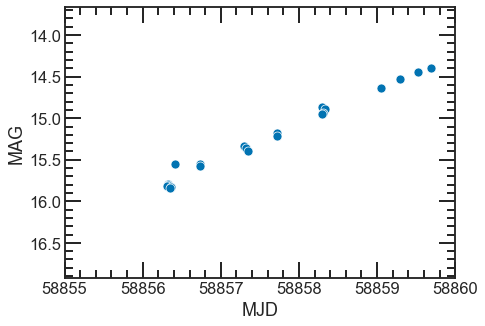

In [26]:
#get rid of the weird data for the sake of getting a clean fit
plt.figure(figsize=(7,5))
sns.scatterplot(x='MJD', y='MAG',data=oneBand);
plt.xlim((58855, 58860))
#sns.scatterplot(x='MJD', y='MAG',data=oneBand_subset, color='k');
plt.gca().invert_yaxis()

In [27]:
t0 - 58864.2

-10.0

/Users/alexgagliano/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:18: RankWarning: Polyfit may be poorly conditioned


(17.0, 13.0)

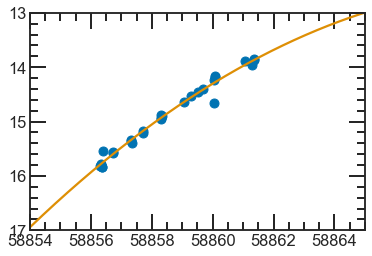

In [28]:
from scipy.interpolate import splev, splrep
oneBand.sort_values(by='MJD', inplace=True)
x = oneBand['MJD'].values
y = oneBand['MAG'].values

def fit(xnew, up):
    ytemp = y[x<58864.2]
    xtemp = x[x<58864.2]
    z = np.polyfit(xtemp, ytemp, 3)
    p = np.poly1d(z)
    y2 = p(xnew)
    return y2

x2 = np.linspace(58854, 58900, num=10000)
#f = splev
#y2 = f(x2,spl)
#plt.plot(x, y, 'o', x2, y2)
plt.plot(x,y,'o', x2, fit(x2, 0.0))
plt.xlim((58854, 58865))
plt.ylim((17, 13))


When does the supernova peak in the 'r'? 

In [29]:
peakTime = oneBand.loc[oneBand['MAG'] == np.min(oneBand['MAG']), 'MJD'].values[0]

For fitting, we now separate into rise, peak, and fall components of the supernova lightcurve. 

In [30]:
#get the points with lowest error
oneBand.sort_values(by=['MJD'], inplace=True)
rise = oneBand[oneBand['MJD'] < peakTime]
peak = oneBand[np.abs(oneBand['MJD'] - peakTime) < 0.2]
fall = oneBand[oneBand['MJD'] > peakTime]

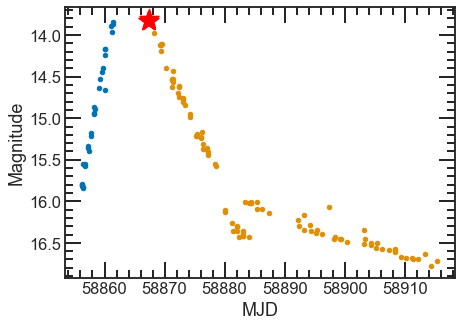

In [31]:
plt.figure(figsize=(7,5))
plt.plot(rise['MJD'], rise['MAG'], '.')
plt.scatter(peak['MJD'], peak['MAG'], marker='*', s=400, zorder=100, c='r')
plt.plot(fall['MJD'], fall['MAG'], '.')
plt.xlabel("MJD")
plt.ylabel("Magnitude")
plt.gca().invert_yaxis()

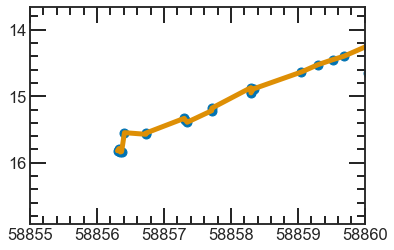

In [32]:
from scipy.signal import savgol_filter
xhat, yhat = savgol_filter((oneBand['MJD'], oneBand['MAG']), 3, 2) # window size 17, polynomial order 2
plt.plot(oneBand['MJD'], oneBand['MAG'], 'o')
plt.plot(xhat, yhat, lw=5)
plt.xlim((58855, 58860))
plt.gca().invert_yaxis()

/Users/alexgagliano/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: RankWarning: Polyfit may be poorly conditioned
  after removing the cwd from sys.path.


(17.0, 14.0)

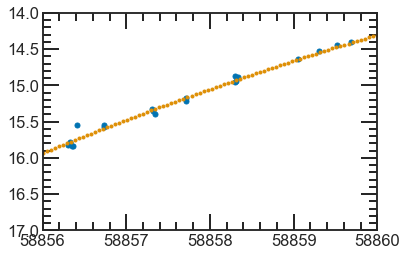

In [33]:
#plt.plot(xnew, ynew, 'o', markersize=3)
#f = fit(oneBand['MJD'], [3,1])
plt.plot(oneBand['MJD'], oneBand['MAG'], 'o', markersize=5)
plt.plot(np.linspace(58856, 58880, num=500), fit(np.linspace(58856, 58880, num=500), 0.0), 'o', markersize=3)
plt.gca().invert_yaxis()
plt.xlim((58856, 58860))
plt.ylim(17, 14)

And, fitting both the rise and decline: 

A pretty good fit! This will serve as our mean model for this data - we'll now use George to create a gaussian process to fit the data a little more closely. 

['U']
['B']


/Users/alexgagliano/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in power
  after removing the cwd from sys.path.
/Users/alexgagliano/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in power
  after removing the cwd from sys.path.


['g', 'g-ZTF', 'gp']
['r', 'r-ZTF', 'rp']


/Users/alexgagliano/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in power
  after removing the cwd from sys.path.
/Users/alexgagliano/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in power
  after removing the cwd from sys.path.


['i', 'i-ZTF', 'ip']


/Users/alexgagliano/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in power
  after removing the cwd from sys.path.


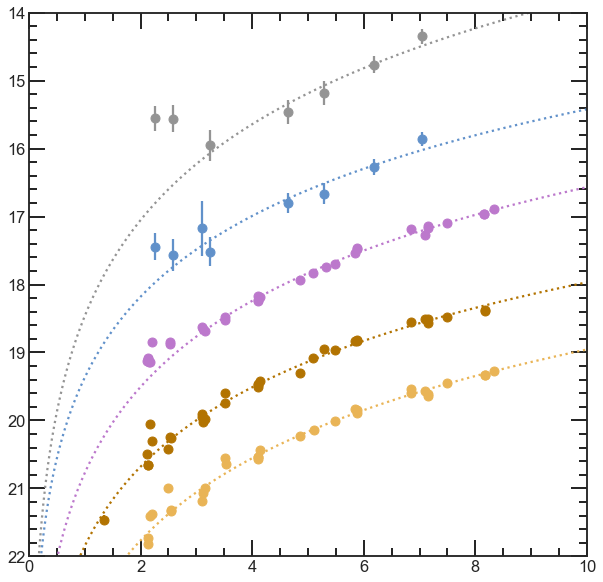

In [34]:
from scipy.optimize import curve_fit

def func(x, a, b, c):
        return a*(x-t0)**b + c

    
cols = sns.color_palette("colorblind", 10)
#cols_hex = cols.as_hex()
cols = np.array([cols[3], cols[1], cols[8], cols[2], cols[9], cols[0], cols[4], cols[5], cols[7]])
cols = np.flip(cols)

#bands_list = [['rp', 'r-ZTF', 'r'], ['gp', 'g-ZTF', 'g'], ['B'], ['U', 'u', 'up']]
bands_list = [['U'], ['B'], ['g', 'g-ZTF', 'gp'], ['r', 'r-ZTF', 'rp'], ['i', 'i-ZTF', 'ip'],]

newbands_list = bands_list[:]
cleaned_data = []
bands_idx = []

shift = [-0.5, 1.5, 1.5*2.2, 1.5*3, 1.5*3.5]
plt.figure(figsize=(10,10))
for i in np.arange(len(bands_list)):
    bands = bands_list[i]
    print(bands)
    oneBand = data[data['FLT'].isin(bands)]
    oneBand = oneBand[oneBand['TELESCOPE']!='Sinistro']
  #  newData = newData[newData['FLT'].isin(bands)]
    oneBand.sort_values(by=['MJD'], inplace=True)
    
    #combine online data plus newly reduced Swope photometry
   # oneBand = pd.concat([oneBand, newData], ignore_index=True)
    #make sure our observations are unique
    oneBand.dropna(subset=['MAG', 'MAGERR', 'MJD', 'FLT'], inplace=True)
    oneBand.drop_duplicates(subset=['MJD', 'MAG', 'FLT'], inplace=True)
    
    #only use if we have enough points for the fitting: 
    if len(oneBand) > 1:
        bands_idx.append(np.ones(len(oneBand))*i)
        cleaned_data.append(oneBand)
        x = oneBand['MJD'].values
        y = oneBand['MAG'].values
        tel = oneBand['TELESCOPE'].values
        x2 = np.linspace(58854, 58900, num=10000)

        tcut = 3.
        teltemp = tel[(x<(t0 + 10)) & (x>=(t0 + tcut))]
        ytemp = y[(x<(t0 + 10)) & (x>=(t0 + tcut))]
        xtemp = x[(x<(t0 + 10))& (x>=(t0 + tcut))]
        
        popt, pcov = curve_fit(func, xtemp, ytemp, maxfev=10000)
        if bands[0] in ['i', 'g', 'r']:
            teltemp = np.concatenate([teltemp, tel[0:1]], axis=0)
            ytemp = np.concatenate([ytemp, y[0:1]], axis=0)
            xtemp = np.concatenate([xtemp, x[0:1]], axis=0)
        #plt.figure(figsize=(10,7))
        plt.errorbar(oneBand['MJD']-t0, oneBand['MAG']+shift[i], yerr=oneBand['MAGERR'], fmt='o', label=bands, c=cols[i])
        plt.plot(x2-t0, func(x2, popt[0], popt[1], popt[2])+shift[i], c=cols[i], ls=':')
        plt.xlim((0, 10))
        plt.ylim((22, 14))
#plt.legend()
plt.show()
    
#    else:
#        newbands_list.remove(bands)
#bands_idx = np.concatenate(bands_idx)
#cleaned_df = pd.concat(cleaned_data, ignore_index=True)
#bands_list = newbands_list

In [35]:
oneBand['MAG'] - func(oneBand['MAG'], popt[0], popt[1], popt[2])

374   NaN
375   NaN
376   NaN
377   NaN
378   NaN
       ..
330   NaN
335   NaN
329   NaN
332   NaN
323   NaN
Name: MAG, Length: 119, dtype: float64

/Users/alexgagliano/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in power
  after removing the cwd from sys.path.


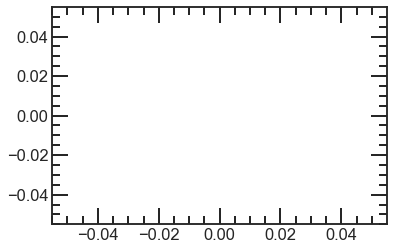

In [36]:
plt.plot(oneBand['MJD']-t0, oneBand['MAG'] - func(oneBand['MAG'].values, popt[0], popt[1], popt[2]))

['U']
['B']
['g', 'g-ZTF', 'gp']
['r', 'r-ZTF', 'rp']


/Users/alexgagliano/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in power
  after removing the cwd from sys.path.
/Users/alexgagliano/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in power
  after removing the cwd from sys.path.
/Users/alexgagliano/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in power
  after removing the cwd from sys.path.
/Users/alexgagliano/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in power
  after removing the cwd from sys.path.
/Users/alexgagliano/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in power
  after removing the cwd from sys.path.


['i', 'i-ZTF', 'ip']


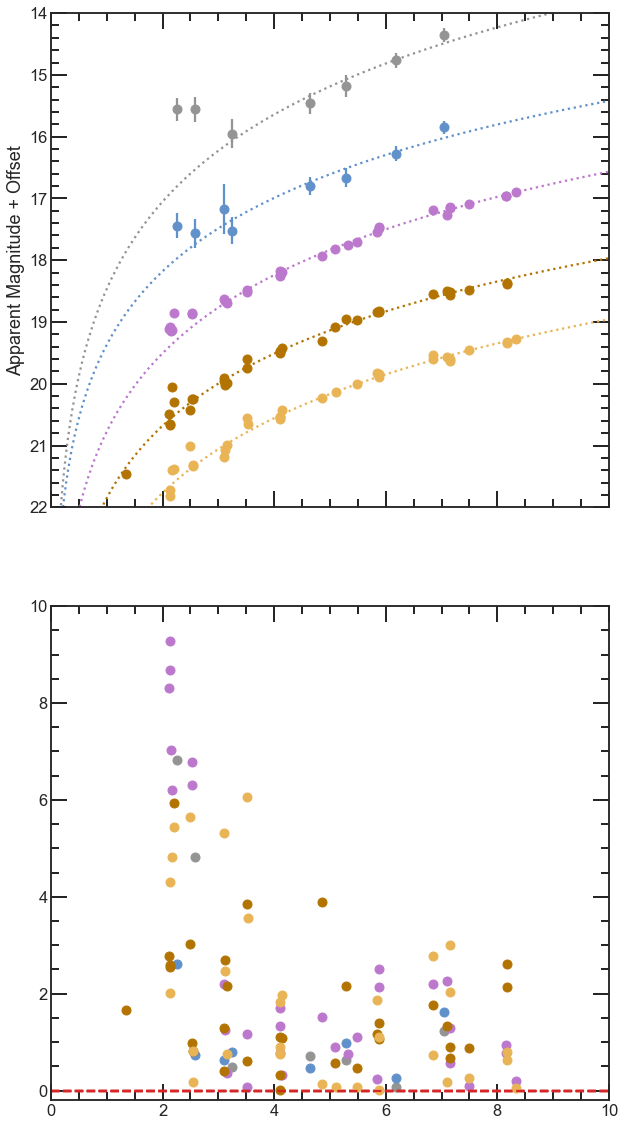

In [37]:
from scipy.optimize import curve_fit

def func(x, a, b, c):
        return a*(x-t0)**b + c

    
cols = sns.color_palette("colorblind", 10)
#cols_hex = cols.as_hex()
cols = np.array([cols[3], cols[1], cols[8], cols[2], cols[9], cols[0], cols[4], cols[5], cols[7]])
cols = np.flip(cols)

#bands_list = [['rp', 'r-ZTF', 'r'], ['gp', 'g-ZTF', 'g'], ['B'], ['U', 'u', 'up']]
bands_list = [['U'], ['B'], ['g', 'g-ZTF', 'gp'], ['r', 'r-ZTF', 'rp'], ['i', 'i-ZTF', 'ip'],]

newbands_list = bands_list[:]
cleaned_data = []
bands_idx = []

shift = [-0.5, 1.5, 1.5*2.2, 1.5*3, 1.5*3.5]
fig, axs = plt.subplots(2, 1, figsize=(10,20), sharex=True)
ax1 = axs[0]
ax2 = axs[1]
for i in np.arange(len(bands_list)):
    bands = bands_list[i]
    print(bands)
    oneBand = data[data['FLT'].isin(bands)]
    oneBand = oneBand[oneBand['TELESCOPE']!='Sinistro']
  #  newData = newData[newData['FLT'].isin(bands)]
    oneBand.sort_values(by=['MJD'], inplace=True)
    
    #combine online data plus newly reduced Swope photometry
   # oneBand = pd.concat([oneBand, newData], ignore_index=True)
    #make sure our observations are unique
    oneBand.dropna(subset=['MAG', 'MAGERR', 'MJD', 'FLT'], inplace=True)
    oneBand.drop_duplicates(subset=['MJD', 'MAG', 'FLT'], inplace=True)
    
    #only use if we have enough points for the fitting: 
    if len(oneBand) > 1:
        bands_idx.append(np.ones(len(oneBand))*i)
        cleaned_data.append(oneBand)
        x = oneBand['MJD'].values
        y = oneBand['MAG'].values
        tel = oneBand['TELESCOPE'].values
        x2 = np.linspace(58854, 58900, num=10000)

        tcut = 3.
        teltemp = tel[(x<(t0 + 10)) & (x>=(t0 + tcut))]
        ytemp = y[(x<(t0 + 10)) & (x>=(t0 + tcut))]
        xtemp = x[(x<(t0 + 10))& (x>=(t0 + tcut))]
        
        popt, pcov = curve_fit(func, xtemp, ytemp, maxfev=10000)
        if bands[0] in ['i', 'g', 'r']:
            teltemp = np.concatenate([teltemp, tel[0:1]], axis=0)
            ytemp = np.concatenate([ytemp, y[0:1]], axis=0)
            xtemp = np.concatenate([xtemp, x[0:1]], axis=0)
        #plt.figure(figsize=(10,7))
        ax1.errorbar(oneBand['MJD']-t0, oneBand['MAG']+shift[i], yerr=oneBand['MAGERR'], fmt='o', label=bands, c=cols[i])
        ax1.plot(x2-t0, func(x2, popt[0], popt[1], popt[2])+shift[i], c=cols[i], ls=':')
        ax1.set_xlim((0, 10))
        ax1.set_ylim((22, 14))
        ax1.set_ylabel("Apparent Magnitude + Offset")
        
        ax2.plot(oneBand['MJD']-t0, np.abs(func(oneBand['MJD'], popt[0], popt[1], popt[2])-oneBand['MAG'])/oneBand['MAGERR'], 'o', c=cols[i])
        ax2.set_xlim((0, 10))
        ax2.set_ylim(-0.2, 10)
        ax2.axhline(y=0, ls='--', c='tab:red')

In [38]:
fmodel17_bump = func(xtemp_bump-t0, popt[0], popt[1])
fmodel2_bump = func2(xtemp_bump-t0, popt2[0], popt2[1])
chi17_bump = (ftemp_bump - fmodel17_bump)**2/ftemp_bump_err**2  
chi2_bump = (ftemp_bump - fmodel2_bump)**2/ftemp_bump_err**2 

NameError: name 'xtemp_bump' is not defined

In [ ]:
reducedchi17_bump

In [ ]:
print(np.nanmedian(reducedchi17_bump))
print(np.nanmedian(reducedchi2_bump))

['U']
['B']
['g', 'g-ZTF', 'gp']
['V']
['r', 'r-ZTF', 'rp']
['i', 'i-ZTF', 'ip']
0.5905890436063935
2.692998415513895
7.1141392395827445
20.658773801456714


/Users/alexgagliano/miniconda3/lib/python3.7/site-packages/scipy/optimize/minpack.py:829: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)
/Users/alexgagliano/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:45: RuntimeWarning: invalid value encountered in power
/Users/alexgagliano/miniconda3/lib/python3.7/site-packages/scipy/optimize/minpack.py:829: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)
/Users/alexgagliano/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:45: RuntimeWarning: invalid value encountered in power
/Users/alexgagliano/miniconda3/lib/python3.7/site-packages/scipy/optimize/minpack.py:829: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)
/Users/alexgagliano/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:45: RuntimeWarning: invalid value encountered in power
/Users/alexgagliano/miniconda3/

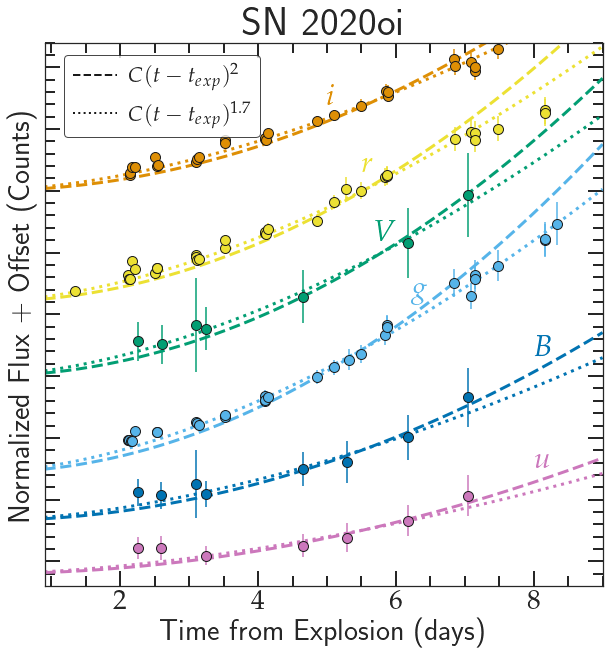

In [50]:
from scipy.optimize import curve_fit
from matplotlib.patches import Patch
from matplotlib.lines import Line2D

plt.rcParams.update({
    "text.usetex": True,
    "font.family": "sans-serif",
    "font.sans-serif": ["Helvetica"]})
## for Palatino and other serif fonts use:
plt.rcParams.update({
    "text.usetex": True,
    "font.family": "serif",
    "font.serif": ["Palatino"],
})

sns.set(font_scale=2.5)
sns.set_style("white")
sns.set_style("ticks", {"xtick.major.size": 20, "ytick.major.size": 40})
sns.set_style("ticks", {"xtick.minor.size": 8, "ytick.minor.size": 8})

sns.set_style('white', {'axes.linewidth': 0.5})
plt.rcParams['xtick.major.size'] = 15
plt.rcParams['ytick.major.size'] = 15

plt.rcParams['xtick.minor.size'] = 10
plt.rcParams['ytick.minor.size'] = 10
plt.rcParams['xtick.minor.width'] = 2
plt.rcParams['ytick.minor.width'] = 2

plt.rcParams['xtick.major.width'] = 2
plt.rcParams['ytick.major.width'] = 2
plt.rcParams['xtick.bottom'] = True
plt.rcParams['xtick.top'] = True
plt.rcParams['ytick.left'] = True
plt.rcParams['ytick.right'] = True

plt.rcParams['xtick.minor.visible'] = True
plt.rcParams['ytick.minor.visible'] = True
plt.rcParams['xtick.direction'] = 'in'
plt.rcParams['ytick.direction'] = 'in'


#right now c is not being fit
def func(x, a, C):
        return a*x**1.7

def func2(x, a, C):
    return a*x**2
    
cols = sns.color_palette("colorblind", 10)
#cols_hex = cols.as_hex()
cols = np.array([cols[3], cols[1], cols[8], cols[2], cols[9], cols[0], cols[4], cols[5], cols[7]])
#cols = np.flip(cols)

#bands_list = [['rp', 'r-ZTF', 'r'], ['gp', 'g-ZTF', 'g'], ['B'], ['U', 'u', 'up']]
bands_list = [['U'], ['B'], ['g', 'g-ZTF', 'gp'], ['V'], ['r', 'r-ZTF', 'rp'], ['i', 'i-ZTF', 'ip']]

cols = [cols[6], cols[5], cols[4], cols[3], cols[2], cols[1]]

newbands_list = bands_list[:]
cleaned_data = []
bands_idx = []
reducedchi17 = []
reducedchi2 = []

reducedchi17_bump = []
reducedchi2_bump = []

chi17_all = []
chi2_all = []

chi17_bump_all = []
chi2_bump_all = []

N = 0
N_bump = 0

shift = [-0.5, 1.5*1.1, 1.5*2.4, 1.5*5, 1.5*7, 1.5*10]
fig = plt.figure(figsize=(10,15))

for i in np.arange(len(bands_list)):
    bands = bands_list[i]
    print(bands)
    oneBand = data[data['FLT'].isin(bands)]
    oneBand = oneBand[oneBand['TELESCOPE']!='Sinistro']
  #  newData = newData[newData['FLT'].isin(bands)]
    oneBand.sort_values(by=['MJD'], inplace=True)
    
    #combine online data plus newly reduced Swope photometry
   # oneBand = pd.concat([oneBand, newData], ignore_index=True)
    #make sure our observations are unique
    oneBand.dropna(subset=['MAG', 'MAGERR', 'MJD', 'FLT'], inplace=True)
    oneBand.drop_duplicates(subset=['MJD', 'MAG', 'FLT'], inplace=True)
    
    #only use if we have enough points for the fitting: 
    if len(oneBand) > 1:
        bands_idx.append(np.ones(len(oneBand))*i)
        cleaned_data.append(oneBand)
        x = oneBand['MJD'].values
        yerr = oneBand['MAGERR'].values
        y = oneBand['MAG'].values
        tel = oneBand['TELESCOPE'].values
        x2 = np.linspace(58854, 58900, num=10000)

        tcut = 3.
        xmax=10.
        teltemp = tel[(x<(t0 + xmax)) & (x>=(t0 + tcut))]
        ytemp = y[(x<(t0 + xmax)) & (x>=(t0 + tcut))]
        xtemp = x[(x<(t0 + xmax))& (x>=(t0 + tcut))]
        ytemp_err = yerr[(x<(t0 + xmax)) & (x>=(t0 + tcut))]
        
        ytemp_bump = y[(x<(t0 + 2.5)) & (x>=(t0 + 2))]
        xtemp_bump = x[(x<(t0 + 2.5))& (x>=(t0 + 2))]
        ytemp_bump_err = yerr[(x<(t0 + 2.5)) & (x>=(t0 + 2))]

        msol = -26.74
        fsol = 1367 #W/m^2
        ftemp = 10**(-0.4*(ytemp-msol))*1367/1.e-14
        ftemp_err = 2.303*ftemp*ytemp_err
        
        ftemp_bump = 10**(-0.4*(ytemp_bump-msol))*1367/1.e-14
        ftemp_bump_err = 2.303*ftemp_bump*ytemp_bump_err

        f = 10**(-0.4*(y-msol))*1367/1.e-14
        f_err = 2.303*f*yerr
#        ferr = 
        plt.errorbar(x-t0, f+shift[i], yerr=f_err, fmt='o', c=cols[i], mec='k', ms=10)
        popt, pcov = curve_fit(func, xtemp-t0, ftemp, sigma=ftemp_err, maxfev=100000)
        popt2, pcov2 = curve_fit(func2, xtemp-t0, ftemp, sigma=ftemp_err, maxfev=100000)
        if bands[0] in ['i', 'g', 'r']:
            teltemp = np.concatenate([teltemp, tel[0:1]], axis=0)
            ytemp = np.concatenate([ytemp, y[0:0]], axis=0)
            xtemp = np.concatenate([xtemp, x[0:0]], axis=0)
            ftemp = np.concatenate([ftemp, f[0:0]], axis=0)
        plt.plot(x2-t0, func(x2-t0, popt[0], popt[1])+shift[i], c=cols[i], ls=':', mec='k', lw=3)
        plt.plot(x2-t0, func2(x2-t0, popt2[0], popt2[1])+shift[i], c=cols[i], ls='--', mec='k', lw=3)
        fmodel17 = func(xtemp-t0, popt[0], popt[1])
        fmodel2 = func2(xtemp-t0, popt2[0], popt2[1])
        
        chi17 = np.nansum((ftemp - fmodel17)**2/ftemp_err**2) 
        chi2 = np.nansum((ftemp - fmodel2)**2/ftemp_err**2)

        fmodel17_bump = func(xtemp_bump-t0, popt[0], popt[1])
        fmodel2_bump = func2(xtemp_bump-t0, popt2[0], popt2[1])
        
        chi17_bump = np.nansum((ftemp_bump - fmodel17_bump)**2/ftemp_bump_err**2)
        chi2_bump = np.nansum((ftemp_bump - fmodel2_bump)**2/ftemp_bump_err**2)
        
        chi17_all.append(chi17)
        chi2_all.append(chi2)
        
        chi17_bump_all.append(chi17_bump)
        chi2_bump_all.append(chi2_bump)
        
        N += len(ftemp)
        N_bump += len(ftemp_bump)

        fmodel17_full = func(x-t0, popt[0], popt[1])
        fmodel2_full = func2(x-t0, popt2[0], popt2[1])
        sigmas = (f - fmodel17_full)/f_err
        sigmas2 = (f - fmodel2_full)/f_err
        plt.xlim((0.9, 9))
        plt.ylabel("Normalized Flux + Offset")
        
reducedchi17 = np.sum(chi17_all)/(N-1)
reducedchi2 = np.sum(chi2_all)/(N-1)
reducedchi17_bump = np.sum(chi17_bump_all)/(N_bump-1)
reducedchi2_bump = np.sum(chi2_bump_all)/(N_bump-1)

plt.xlabel("Time from Explosion (days)")
plt.ylim((-1, 21))

plt.text(8, 3.8, r"$u$", color=cols[0],transform=plt.gca().transData, fontweight='heavy')
plt.text(8, 8.3, r"$B$", color=cols[1],transform=plt.gca().transData)
plt.text(6.2, 10.7, r"$g$",color=cols[2],transform=plt.gca().transData)
plt.text(5.7, 13,   r"$V$",color=cols[3],transform=plt.gca().transData)
plt.text(5.5, 15.8, r"$r$",  color=cols[4],transform=plt.gca().transData)
plt.text(5, 18.5,  r"$i$", color=cols[5],transform=plt.gca().transData)


legend_elements = [Line2D([0], [0], lw=2, ls='--', color='k', label=r' $C(t-t_{exp})^2$',
                        markerfacecolor='w', mec='k',markersize=15, mew=2),
                   Line2D([0], [0],lw=2, ls=':', color='k', label=r' $C(t-t_{exp})^{1.7}$',
                        markerfacecolor='w', mec='k',markersize=15, mew=2),
]

plt.gca().axes.yaxis.set_ticklabels([])

leg1 = plt.gca().legend(fontsize=22, handles=legend_elements, loc='lower right', handletextpad=0.5, borderaxespad=1.5,labelspacing=0.5, bbox_to_anchor=(0.445,0.835), ncol=1,frameon=True, fancybox=True, edgecolor='k')

print(np.nanmedian(reducedchi17))
print(np.nanmedian(reducedchi2))

print("==============")
print(np.nanmedian(reducedchi17_bump))
print(np.nanmedian(reducedchi2_bump))
#plt.savefig("/Users/alexgagliano/Documents/Research/2020oi/img/FluxExcess.png",dpi=300, bbox_inches='tight')

In [ ]:
shift = [-0.5, 1.5*1.1, 1.5*2.4, 1.5*5, 1.5*7, 1.5*10]
fig = plt.figure(figsize=(10,15))

for i in np.arange(len(bands_list)):
    bands = bands_list[i]
    print(bands)
    oneBand = data[data['FLT'].isin(bands)]
    oneBand = oneBand[oneBand['TELESCOPE']!='Sinistro']
  #  newData = newData[newData['FLT'].isin(bands)]
    oneBand.sort_values(by=['MJD'], inplace=True)
    
    #combine online data plus newly reduced Swope photometry
   # oneBand = pd.concat([oneBand, newData], ignore_index=True)
    #make sure our observations are unique
    oneBand.dropna(subset=['MAG', 'MAGERR', 'MJD', 'FLT'], inplace=True)
    oneBand.drop_duplicates(subset=['MJD', 'MAG', 'FLT'], inplace=True)
    
    #only use if we have enough points for the fitting: 
    if len(oneBand) > 1:        
        bands_idx.append(np.ones(len(oneBand))*i)
        cleaned_data.append(oneBand)
        x = oneBand['MJD'].values
        yerr = oneBand['MAGERR'].values
        y = oneBand['MAG'].values
        tel = oneBand['TELESCOPE'].values
        x2 = np.linspace(58854, 58900, num=10000)

        tcut = 3.
        xmax=10.
        teltemp = tel[(x<(t0 + xmax)) & (x>=(t0 + tcut))]
        ytemp = y[(x<(t0 + xmax)) & (x>=(t0 + tcut))]
        xtemp = x[(x<(t0 + xmax))& (x>=(t0 + tcut))]
        ytemp_err = yerr[(x<(t0 + xmax)) & (x>=(t0 + tcut))]

        msol = -26.74
        fsol = 1367 #W/m^2
        ftemp = 10**(-0.4*(ytemp-msol))*1367/1.e-14
        ftemp_err = 2.303*ftemp*ytemp_err
        
        f = 10**(-0.4*(y-msol))*1367/1.e-14
        f_err = 2.303*f*yerr
        x = np.array(x)
        xold = x.copy()
        x = x[np.abs(xold - t0 - 2.5) < 0.5]
        f = f[np.abs(xold - t0 - 2.5) < 0.5]
        f_err = f_err[np.abs(xold - t0 - 2.5) < 0.5]
        sigma2 = (f - func2(x-t0, popt2[0], popt2[1]))/f_err
        sigma17 = (f - func(x-t0, popt[0], popt[1]))/f_err
        print("Sigma2")
        for j in np.arange(len(sigma17)):
            print("%.2f"%sigma17[j])
        print("Number of significant points:")
        print(np.sum(sigma17 > 5))
#        plt.plot(oneBand['MJD']-t0,sigma, 'o', c=cols[i], label=bands)
        plt.xlim((2, 8))
        plt.ylim(-10, 10)
plt.legend()

In [ ]:
rchisq2 = np.array([0.08577633445022331,
0.08622604327426837,
2.134584144949497,
0.08040788103673595,
4.600001389504459,
3.404327294736899])

rchisq17 = np.array([0.14937163275028026,
0.11221489477601843,
0.29767290019445075,
0.03449883177624158,
0.9759128746987815,
0.9040094625750312])

In [ ]:
np.nanmedian(rchisq17)

In [ ]:
np.nanmedian(rchisq2)

In [43]:
np.nanmedian(err)

NameError: name 'err' is not defined

In [44]:
np.nanmedian(err2)

NameError: name 'err2' is not defined